In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [2]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "password"
HOST = "localhost"
PORT = 5432
DATABASE = "campaign_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [3]:
 # Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
--------
contact_id INTEGER
firstname VARCHAR(50)
lastname VARCHAR(50)
email VARCHAR(100)
last_update TIMESTAMP

campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(100)
description VARCHAR(100)
goal DOUBLE PRECISION
pledged DOUBLE PRECISION
outcome VARCHAR(50)
backers_count INTEGER
country VARCHAR(30)
currency VARCHAR(30)
launch_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(10)
subcategory_id VARCHAR(10)
last_update TIMESTAMP

category
--------
category_id VARCHAR(10)
category VARCHAR(50)
last_update TIMESTAMP

subcategory
--------
subcategory_id VARCHAR(10)
subcategory VARCHAR(50)
last_update TIMESTAMP



In [4]:
conn = engine.connect() 

In [9]:
query = text(f"""
                SELECT 
                	subcategory.subcategory,
                	count(campaign.cf_id) as campaign_num
                
                FROM campaign
                	JOIN subcategory on subcategory.subcategory_id = campaign.subcategory_id
                
                GROUP BY
                	campaign.subcategory_id,
                	subcategory.subcategory
                
                ORDER BY 
                	campaign_num asc
                """) 

df = pd.read_sql(query, con=conn)
df

,subcategory,campaign_num
0,world music,3
1,audio,4
2,metal,7
3,radio & podcasts,8
4,mobile games,13
5,science fiction,14
6,shorts,16
7,television,17
8,jazz,17
9,fiction,17


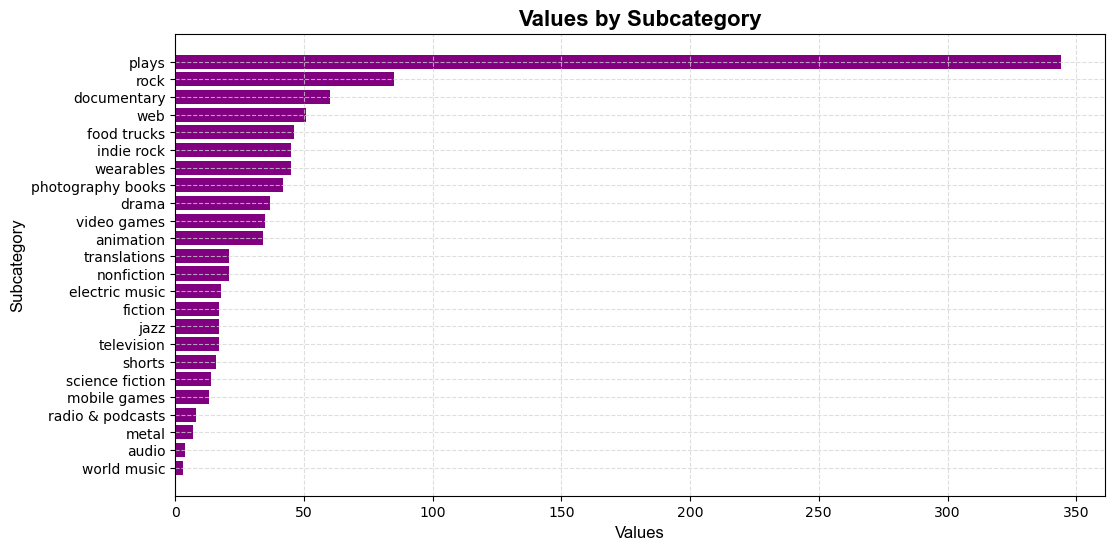

In [16]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.barh(df.subcategory,df.campaign_num, color="purple")

# Add Labels/Title
plt.xlabel("Values", fontfamily="Arial", fontsize=12)
plt.ylabel("Subcategory", fontfamily="Arial", fontsize=12)
plt.title("Values by Subcategory", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

In [30]:
query = text(f"""
            SELECT 
                category.category,
                ROUND(
                    (COUNT(CASE WHEN campaign.outcome = 'successful' THEN 1 END) * 100.0) / COUNT(*), 2) AS success_rate -- Percentage of successful campaigns, rounded to 2 decimal places
            FROM campaign
            JOIN category ON category.category_id = campaign.category_id
            GROUP BY
                campaign.category_id,
                category.category
            ORDER BY 
                success_rate ASC ;
                """) 

df2 = pd.read_sql(query, con=conn)
df2

,category,success_rate
0,games,43.75
1,food,47.83
2,theater,54.36
3,music,56.57
4,film & video,57.30
5,publishing,59.70
6,photography,61.90
7,technology,66.67
8,journalism,100.00


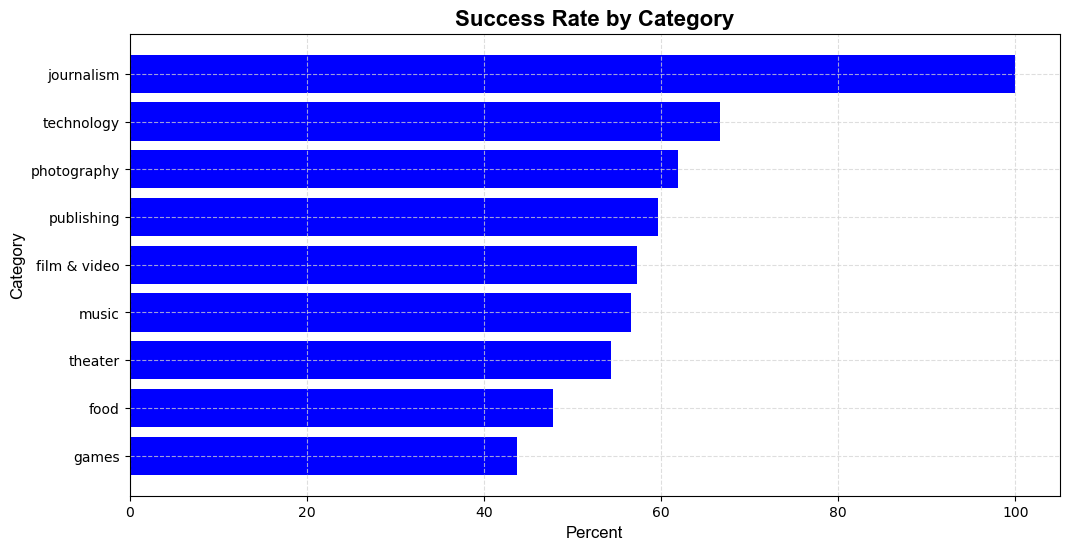

In [18]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create the bar chart
plt.barh(df2.category,df2.success_rate, color="blue")

# Add Labels/Title
plt.xlabel("Percent", fontfamily="Arial", fontsize=12)
plt.ylabel("Category", fontfamily="Arial", fontsize=12)
plt.title("Success Rate by Category", fontweight="bold", fontsize=16, fontfamily="Arial")

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

In [19]:
query = text(f"""SELECT 
            	campaign.category_id,
            	category.category,
            	count(campaign.cf_id) as campaign_num
            
            FROM campaign
            	JOIN category on category.category_id = campaign.category_id
            
            GROUP BY
            	campaign.category_id,
            	category.category
            
            ORDER BY 
            	campaign_num asc
            
                 """) 

df3 = pd.read_sql(query, con=conn)
df3.head()

,category_id,category,campaign_num
0,cat9,journalism,4
1,cat8,photography,42
2,cat1,food,46
3,cat7,games,48
4,cat6,publishing,67


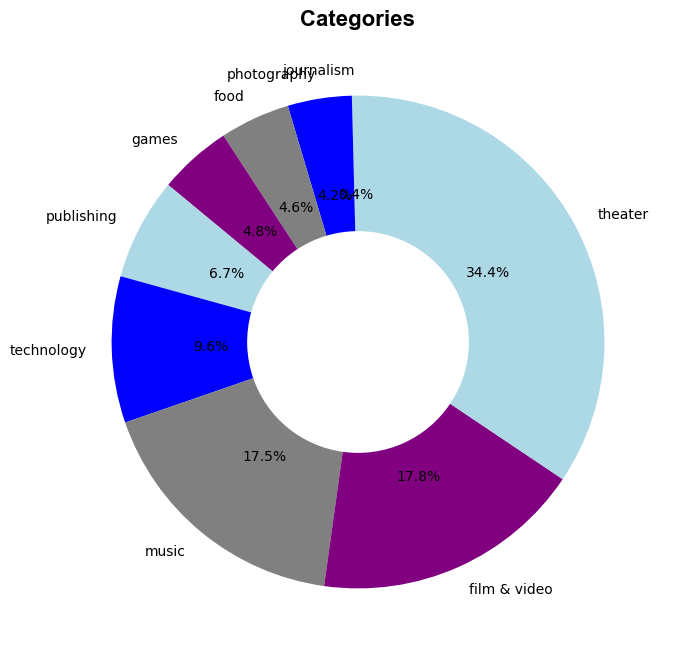

In [29]:
# Change Canvas Size
plt.figure(figsize=(8, 8))

# Create the pie chart with a hole in the center (donut chart)
plt.pie(
    df3.campaign_num, 
    labels=df3.category, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops={'width': 0.55}, 
    colors=['lightblue', 'blue', 'grey', 'purple']
)

# Add Title
plt.title("Categories", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show the Chart
plt.show()

In [ ]:
conn.close()
session.close()

In [ ]:
engine.dispose() 